## importing the dataset

In [21]:
from sklearn.datasets import fetch_openml
mnist= fetch_openml('mnist_784')

# splitting the datset into features and labels
x = mnist["data"]
y = mnist["target"]

# now the shape of x and y is ((70000, 784), (70000,)) and we it not equal to a image dimension's which are (28,28) in this datasets
x.shape,y.shape



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/datasets/_openml.py:932: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


((70000, 784), (70000,))

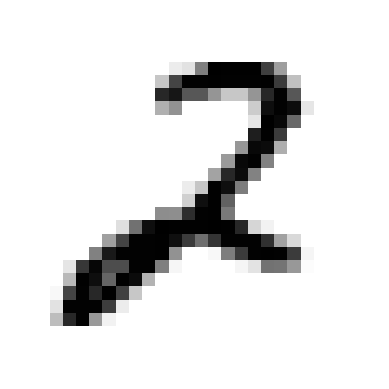

In [31]:
# now changing the shape of the x and y so we can see it as image and we can plot it
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
some_digit = x.to_numpy()[36001]
some_digit_image = some_digit.reshape(28, 28)  # let's reshape to plot it

plt.imshow(some_digit_image, cmap=plt.cm.binary,
           interpolation='nearest')
plt.axis("off")
plt.show()





In [32]:
y[36001]

'2'

In [40]:

import numpy as np
shuffle_index = np.random.permutation(60000)

# import classifier
from sklearn.ensemble import RandomForestClassifier

# create a random seed
import numpy as np
np.random.seed(42)

# perform train test split
x_train, x_test = x[:60000], x[60000:70000]
y_train, y_test = y[:60000], y[60000:70000]

# instantiate a model and fitting it.
clf = RandomForestClassifier()
clf.fit(x_train,y_train)

# cheaking the score
clf.score(x_test,y_test)*100

97.05

In [43]:
# making prediction 
y_preds = clf.predict(x_test)
y_preds

array(['7', '2', '1', ..., '4', '5', '6'], dtype=object)

In [47]:
# evaluating our model
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix

# performing cross-validating split
cv_split = cross_val_score(clf,x,y)
cv_split

# finding confusion matirix
y_preds = clf.predict(x_test)
confusion_matrix(y_test,y_preds)

# Visualize the confution matrix with pd.crosstab()
import pandas as pd
pd.crosstab(y_test,y_preds,rownames=["Actual labels"],colnames=["Predicted labels"])

array([[ 971,    0,    0,    0,    0,    2,    3,    1,    3,    0],
       [   0, 1127,    2,    2,    0,    1,    2,    0,    1,    0],
       [   6,    0, 1002,    5,    3,    0,    3,    8,    5,    0],
       [   1,    0,    9,  972,    0,    9,    0,    9,    8,    2],
       [   1,    0,    0,    0,  955,    0,    5,    1,    4,   16],
       [   5,    1,    1,    9,    2,  860,    5,    2,    5,    2],
       [   7,    3,    0,    0,    3,    3,  937,    0,    5,    0],
       [   1,    4,   20,    2,    0,    0,    0,  990,    2,    9],
       [   4,    0,    6,    7,    5,    5,    5,    4,  930,    8],
       [   7,    6,    2,   12,   12,    1,    0,    4,    4,  961]])

In [ ]:
## now taking input(image) to see whether our trained model can predict the image
import sys
import cv2
import numpy as np

# Load and display an image -- 'mnist.jpg'
input_file = sys.argv[1]
img = cv2.imread("mnist.jpg")

cv2.imshow('Original', img)
